# Where is the Best Place for SW Developers to Make Money

## Introduction / Business Understanding

I understand that topic about SW developers salary is　very typical job seekers. For obtaining some of insights about that matter,
using the data from the Stack Overflow Developer Survey 2019　('https://insights.stackoverflow.com/survey') and OECD average wage data across all industries ('https://data.oecd.org/earnwage/average-wages.htm'), I've dived into those data to answer the following statements;

- Which is the best country from OECD members for SW developers to earn good money?
- How does company size affect SW developer salary by OECD countries?
- Is education level important to make good money for SW developer in OECD countries?


## Data Understanding

### Read in the data and necessary libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 250)
pd.set_option("display.max_colwidth", 200)

In [2]:
df = pd.read_csv('2019_results.csv')

In [3]:
oecd_data =  pd.read_csv('OECD_data190709.csv')

In [4]:
country_region = pd.read_csv('country_region.csv')

In [5]:
df_schema = pd.read_csv('2019_results_schema.csv')

#### Check the columns of data and the meanings of main columns which are used for the analysis.

In [6]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [7]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,

In [8]:
df_schema[df_schema['Column']=="Country"]

,Column,QuestionText
6,Country,In which country do you currently reside?


In [9]:
df_schema[df_schema['Column']=="OrgSize"]

,Column,QuestionText
11,OrgSize,Approximately how many people are employed by the company or organization you work for?


In [10]:
df_schema[df_schema['Column']=="EdLevel"]

,Column,QuestionText
8,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?


In [11]:
df_schema[df_schema['Column']=="ConvertedComp"]

,Column,QuestionText
31,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks."


In [12]:
df.shape

(88883, 85)

In [13]:
df["Country"].value_counts()

United States                            20949
India                                     9061
Germany                                   5866
United Kingdom                            5737
Canada                                    3395
France                                    2391
Brazil                                    1948
Poland                                    1922
Australia                                 1903
Netherlands                               1852
Russian Federation                        1694
Spain                                     1604
Italy                                     1576
Sweden                                    1274
Switzerland                                978
Israel                                     952
Turkey                                     949
Pakistan                                   923
Ukraine                                    868
Austria                                    839
Czech Republic                             764
Romania      

#### There are a lot of countries which sample size is limited in this data as shown above, so I'd like to only focus on the OECD countries for practical analysis.

## Prepare Data

#### For the data analysis, data should be cleaned and some categorical values should be replaced by appropriate one.

In [14]:
df['Region'] = np.nan

In [15]:
for i,j in country_region.values:
    df['Region'].mask(df['Country'] ==  i, j, inplace = True)

In [16]:
df["OrgSize"].unique()

array([nan, '100 to 499 employees', '10,000 or more employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '10 to 19 employees', '20 to 99 employees',
       '1,000 to 4,999 employees', '2-9 employees',
       '500 to 999 employees', '5,000 to 9,999 employees'], dtype=object)

In [17]:
Orgsize_change = {"20 to 99 employees":"20-99","100 to 499 employees":"100-499","10,000 or more employees":"10,000+",
                  "1,000 to 4,999 employees":"1,000-4,999","2-9 employees":"2-9","10 to 19 employees":"10-19","500 to 999 employees":"500-999",
                  "Just me - I am a freelancer, sole proprietor, etc.":"1", "5,000 to 9,999 employees":"5,000-9,999"}  

In [18]:
for i, j in zip(list(Orgsize_change), list(Orgsize_change.values())):
    df['OrgSize'] = df['OrgSize'].str.replace(i,j)

In [19]:
Ed_change = {r"Bachelor’s degree \(BA, BS, B.Eng., etc.\)":'Bachelor',
       r'Master’s degree \(MA, MS, M.Eng., MBA, etc.\)':'Master',
       'Some college/university study without earning a degree':'Others',
       r'Secondary school \(e.g. American high school, German Realschule or Gymnasium, etc.\)':'Others',
       'Associate degree':'Others', r'Other doctoral degree \(Ph.D, Ed.D., etc.\)':'Doctor',
       'Primary/elementary school':'Others', r'Professional degree \(JD, MD, etc.\)':'Doctor',
       'I never completed any formal education':'Others'}

In [20]:
for i, j in zip(list(Ed_change), list(Ed_change.values())):
    df['EdLevel'] = df['EdLevel'].str.replace(i,j)

In [21]:
df['EdLevel'].value_counts().index

Index(['Bachelor', 'Others', 'Master', 'Doctor'], dtype='object')

In [22]:
Ed_order = ['Doctor','Master','Bachelor', 'Others']

In [23]:
OECD = oecd_data.Country
df_oecd = df[df['Country'].isin(OECD.values)]

In [24]:
df_oecd.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,Region
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Others,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,Western Europe
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,Bachelor,"Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a...",100-499,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Interview with people in senior / management roles",No,"Languages, frameworks, and other technologies I'd be working with;Office environment or company culture;Opportunities for professional development",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what seems most important or urgent,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence on purchasing new technology,I have little or no influence,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the time / relax,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,

## Modeling

In this analysis, no machine learning model is implemented. Therefore, no categorical value and missing-value treatment are required.

## Evaluate the Results

### Which is the best country from OECD members for SW developers to earn good money?

#### SW developer salary (median) by OECD countries
- Salary converted to annual USD salaries 
- The United States is the highest and Mexico is the lowest

In [25]:
country_income_order = df_oecd.groupby('Country')['ConvertedComp'].median().sort_values(ascending=False).index

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


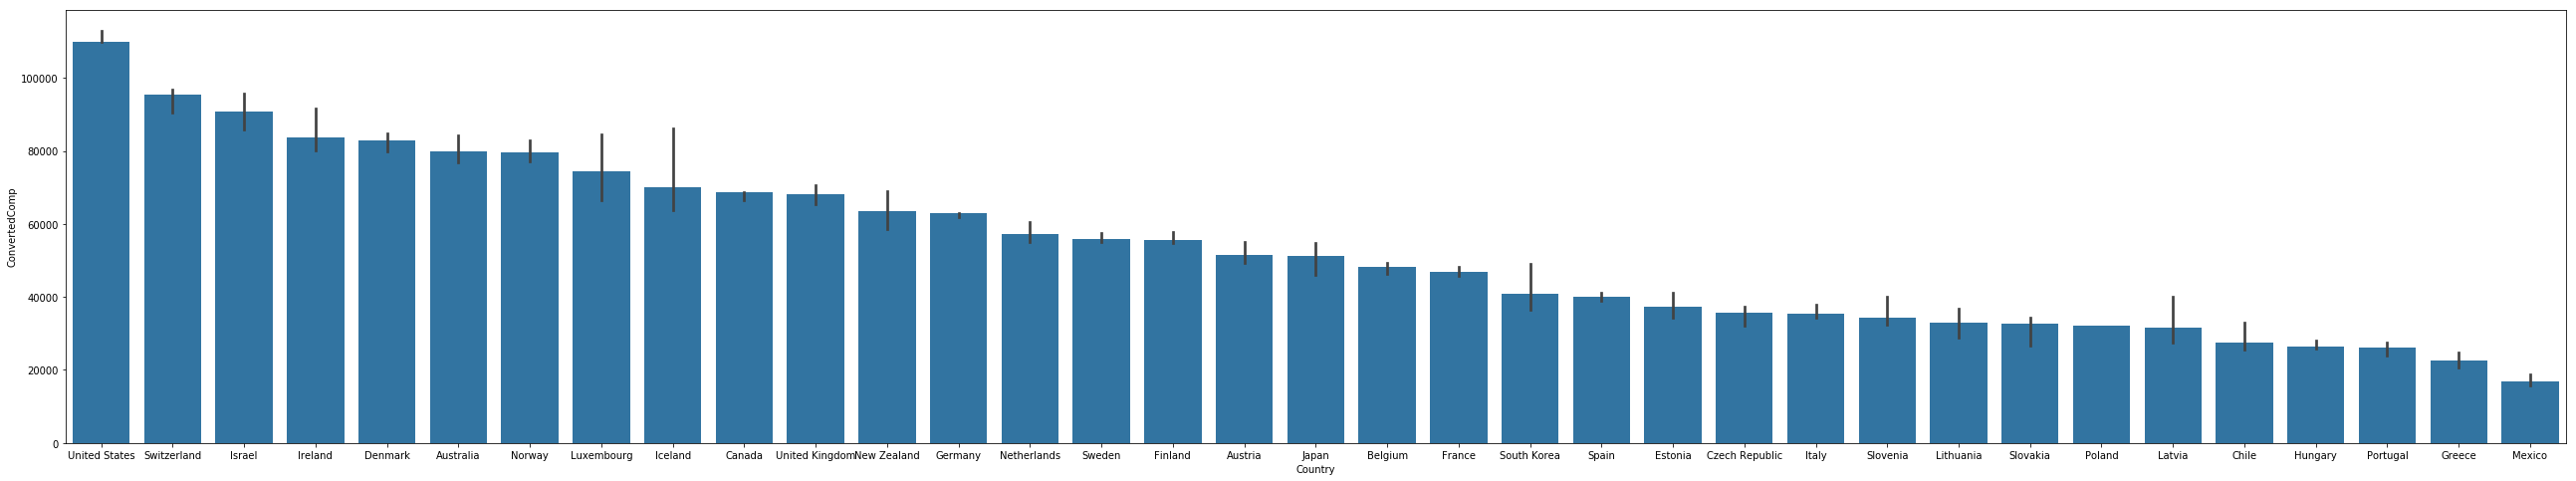

In [26]:
plt.figure(figsize = [45,8])
sns.barplot(x="Country", y="ConvertedComp", color = sns.color_palette()[0],order = country_income_order, data=df_oecd,estimator=median)

In [27]:
def com_income_concat_func(df):
    df_country_pivot = pd.pivot_table(data=df, values='ConvertedComp', 
                                  index='Country', aggfunc=np.median)
    oecd_average = oecd_data[["Country","Average_Income"]]
    oecd_average = oecd_average.set_index('Country')
    comp_income_concat = pd.concat([oecd_average, df_country_pivot],axis=1)
    comp_income_concat.index.names = ["Country"]
    comp_income_concat = comp_income_concat.reset_index()
    comp_income_concat = comp_income_concat.sort_values(by="ConvertedComp", ascending = False)
    comp_income_concat['Diff'] = comp_income_concat['ConvertedComp'] -comp_income_concat['Average_Income']
    comp_income_concat['pc']= comp_income_concat['Diff'] /comp_income_concat['Average_Income']
    return comp_income_concat
    """Summary or Description of the Function

    Parameters:
    argument1: dataframe 

    Returns:
    dataframe of pivoted table by country and income (median) with OECD average data.

   """

In [28]:
comp_income_concat = com_income_concat_func(df_oecd)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


- There is a strong positive correlation between SW developer salary("ConvertedComp") and average income("Average_Income") across all industries by countries. 

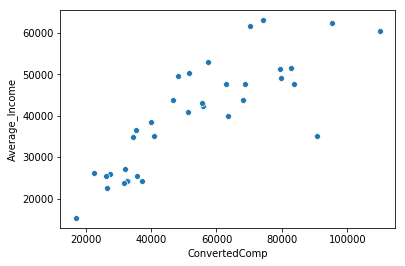

In [29]:
sns.scatterplot(x="ConvertedComp", y="Average_Income",data=comp_income_concat);

In [30]:
comp_income_concat.corr()

,Average_Income,ConvertedComp,Diff,pc
Average_Income,1.000000,0.827558,0.433291,0.183336
ConvertedComp,0.827558,1.000000,0.864520,0.686306
Diff,0.433291,0.864520,1.000000,0.937673
pc,0.183336,0.686306,0.937673,1.000000


- Comparing SW Developer salary and national average income, the difference magnitude varies by countries. SW developer in Israel earns most comparing to the country's national average and English spoken countries such as US, Ireland, Australia, Canala etc. tend to mark higher different rate. 

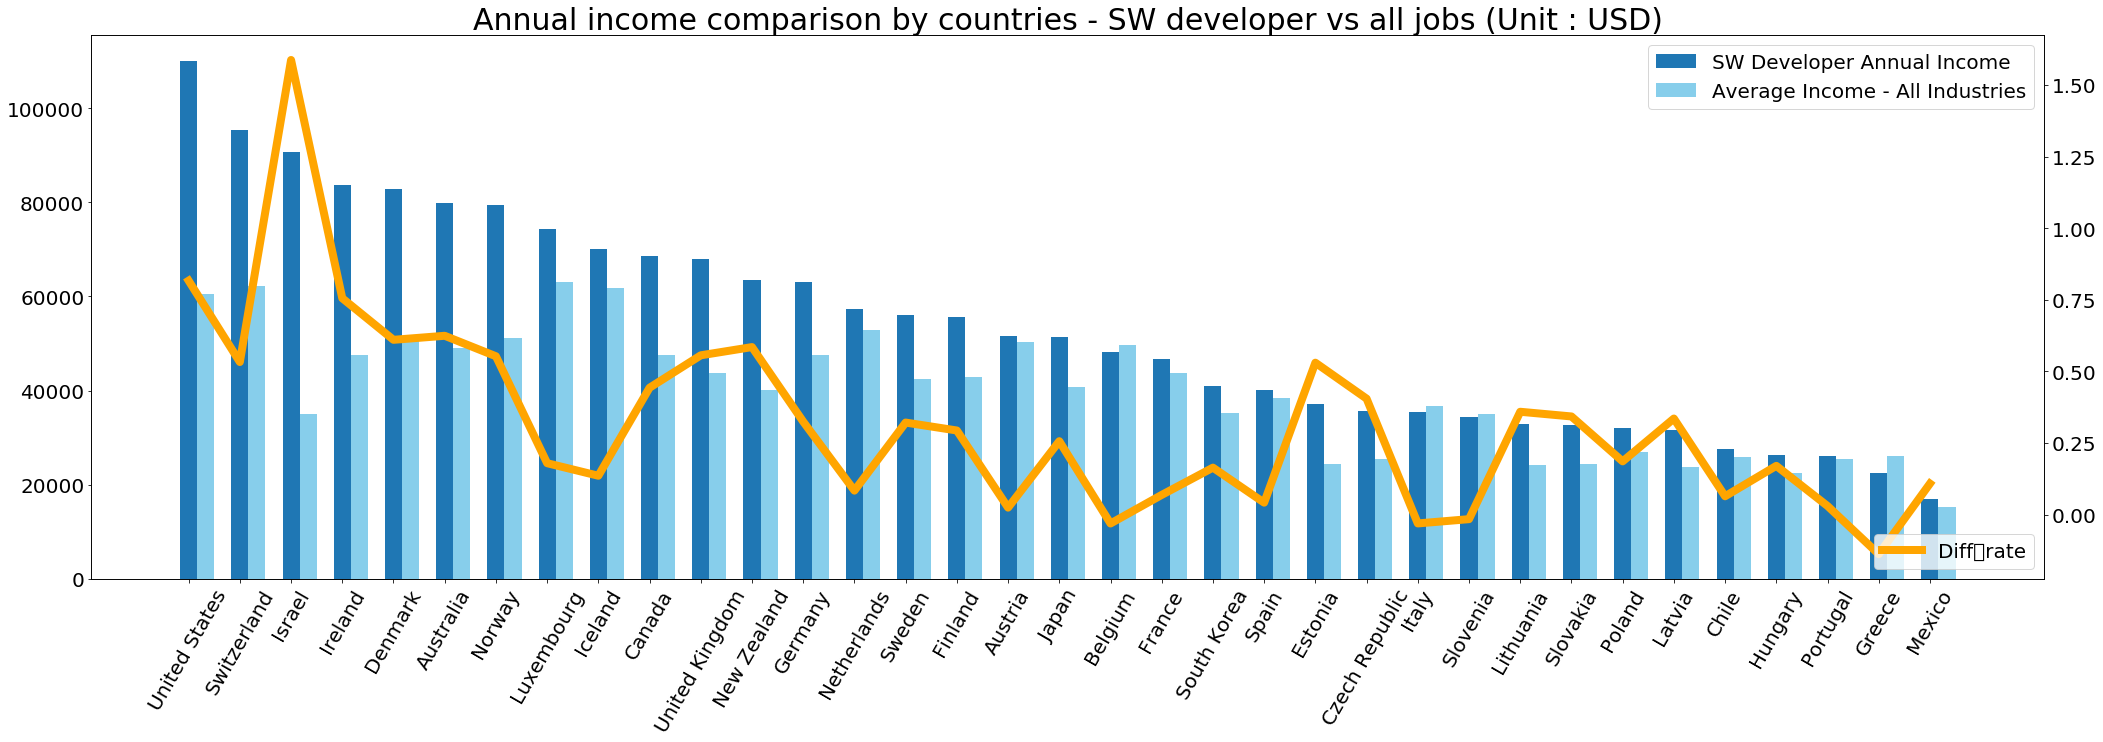

<Figure size 3240x576 with 0 Axes>

In [31]:
x1 = range(0,105,3)
x2 = range(1,105,3)

fig = plt.figure(figsize=(35.0, 10.0))
ax1 = fig.add_subplot(111)
plt.title("Annual income comparison by countries - SW developer vs all jobs (Unit : USD)",fontsize=30)
ax1.bar(x1, comp_income_concat['ConvertedComp'], width=1, align="center",label='SW Developer Annual Income')
plt.bar(x2, comp_income_concat['Average_Income'], width=1, align="center",color = "skyblue",label='Average Income - All Industries')
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
ax2 = ax1.twinx()
ax2.plot(x1, comp_income_concat['pc'],linewidth = 8.0,color = "Orange", label = 'Diff　rate')
plt.legend(loc = 'lower right', fontsize=20)
plt.xticks(x1,comp_income_concat['Country'])
plt.yticks(fontsize=20)
labels = ax1.get_xticklabels()
plt.setp(labels, rotation=60, fontsize=20)
plt.figure(figsize = [45,8])
plt.show();

### How does company size affect SW developer salary by OECD countries?

- SW developer annual income by company sizes for all OECD countries.

In [32]:
Org_order = [ '1', '2-9','10-19', '20-99','100-499', '500-999',  '1,000-4,999','5,000-9,999','10,000+']

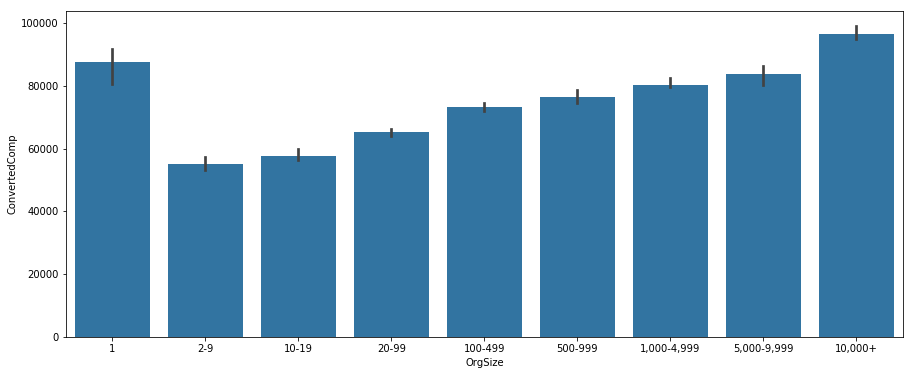

In [33]:
plt.figure(figsize = [15,6])
sns.barplot(x="OrgSize", y="ConvertedComp", order = Org_order, color = sns.color_palette()[0],data=df_oecd,estimator=median);

- Altough there are some ouliers, there is a general tendancy that larger companies pay larger money except freelance　/ self-employed company. 

In [34]:
def create_pivot(df_oecd, values, columns, index, order1, order2):
    df_org_pivot = pd.pivot_table(data=df_oecd, values=values, 
                                  columns=columns, index=index, aggfunc=np.median)
    df_org_pivot = df_org_pivot.loc[order1,order2]
    df_org_pivot = df_org_pivot.fillna(0)
    df_org_pivot = df_org_pivot.astype(int)
    return df_org_pivot    
    """Summary or Description of the Function

    Parameters:
    argument1 (dataframe):  dataframe of original data, 
    argument2 (str): column name of the dataframe used for values of pivot table
    argument3 (str):column name of the dataframe used for columns of pivot table
    argument4 (str):column name of the dataframe used for index of pivot table,
    argument5 (list):Order of index of pivot table
    argument6 (list):Order of columns of pivot table

    Returns:
    dataframe of pivot table by designated value, column and index with designated orders prepared for visualization.

   """

In [35]:
df_org_pivot2 = create_pivot(df_oecd, 'ConvertedComp', 'OrgSize', 'Country', country_income_order, Org_order)

In [37]:
def heatmap_cre(title,pivot_table,cmap):
    plt.figure(figsize=(10, 10))
    plt.title(title,fontsize=10)
    sns.heatmap(pivot_table,cmap=cmap, annot=True, fmt="d",vmin=0, vmax=100000) 
    """Summary or Description of the Function

    Parameters:
    argument 1 (str): title of heatmap
    argument 2 (dataframe): pivot_table to show as heatmap
    argument 3 (str):cmap
    
    Returns:
    heatmap visualization.

   """

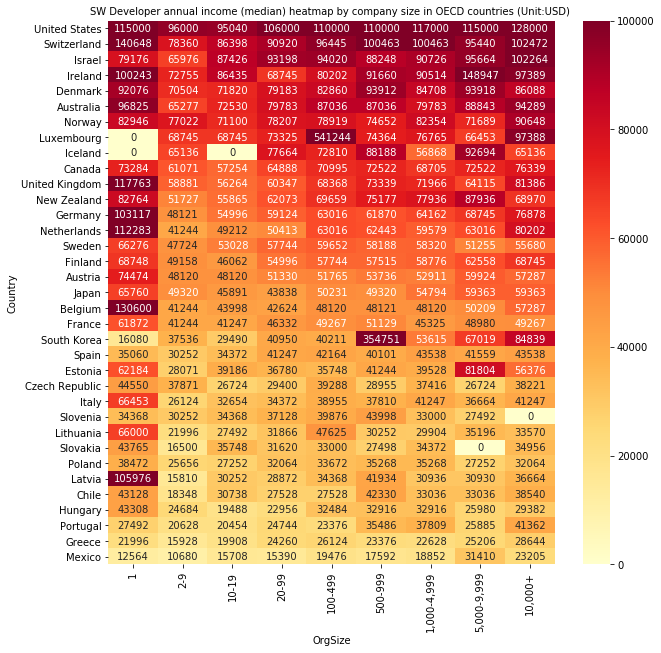

In [38]:
heatmap_cre("SW Developer annual income (median) heatmap by company size in OECD countries (Unit:USD) ",df_org_pivot2,"YlOrRd")

### Is education level important to make good money for SW developer in OECD countries?

#### There is a clear difference between bachelor or higher education level and undergraduate of college for all OECD countries. On the other hand there is small differences among the degrees of doctor, master and bachelor.

In [39]:
Ed_order = ["Doctor","Master","Bachelor","Others"]

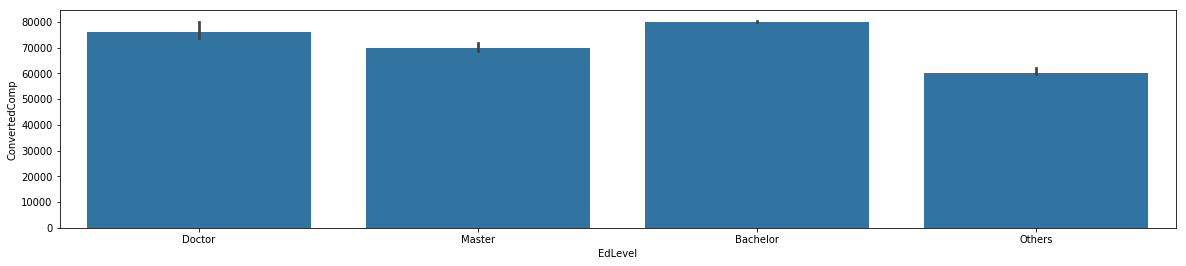

In [40]:
plt.figure(figsize = [20,4])
sns.barplot(x="EdLevel", y="ConvertedComp", color = sns.color_palette()[0],data=df_oecd, order = Ed_order, estimator=median);

#### The SW developer employees who have doctor or master tend to earn highest money in the Most of OECD countries.

In [41]:
df_edlevel_pivot = create_pivot(df_oecd, 'ConvertedComp', 'EdLevel', 'Country', country_income_order, Ed_order)

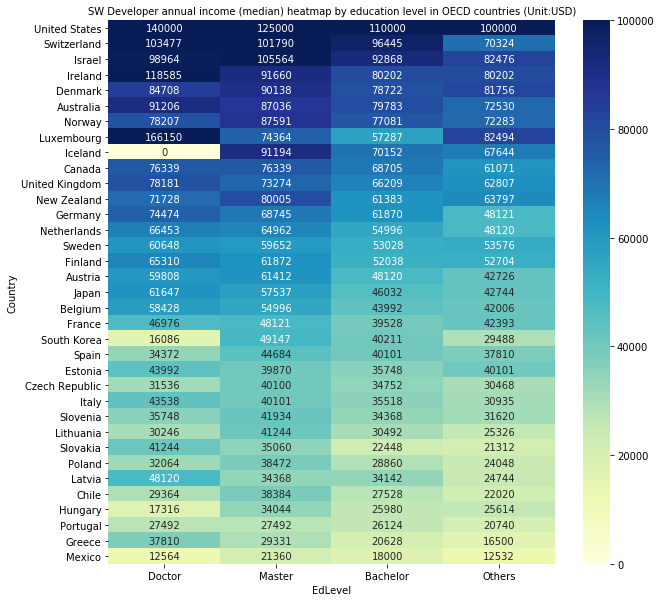

In [42]:
heatmap_cre("SW Developer annual income (median) heatmap by education level in OECD countries (Unit:USD)",df_edlevel_pivot,"YlGnBu")

## Deploy

Blog post about the analysis above is accessed from the url below;
<https://medium.com/@yusuke244106/where-is-the-best-place-for-software-developers-to-make-money-c5480b9ef344> 